In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [88]:

# Load California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["PRICE"] = housing.target * 100000  # Convert to a meaningful scale


# Display first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


In [89]:

# Check for missing values
df.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

In [ ]:

# Selecting relevant features (MedInc - Median Income, HouseAge - Age of the House, AveRooms - Average Rooms per Dwelling, AveBedrms - Average Bedrooms per Dwelling)
X = df[["MedInc", "HouseAge", "AveRooms","AveBedrms"]]
y = df["PRICE"]

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: PRICE, dtype: float64


In [ ]:

# Creating and training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)


In [92]:

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 6435680467.79
R-squared Score: 0.51


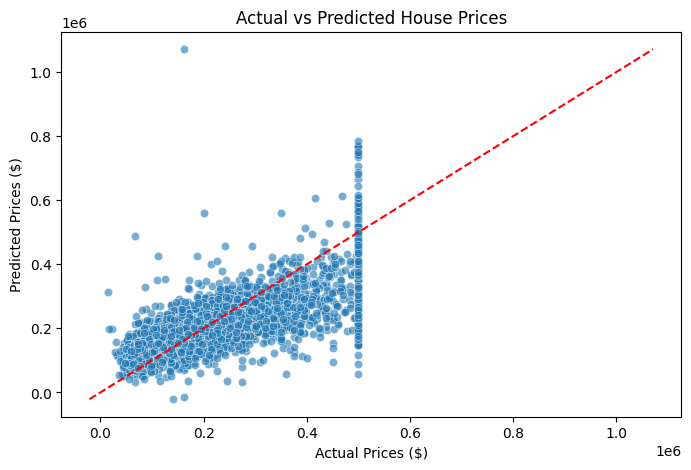

In [ ]:

# Plot actual vs predicted values
print(y_pred[:5])  # Display first 5 predictions
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

# Convert PRICE into a binary classification problem
# 1 = High price, 0 = Low price (based on median price)
median_price = df["PRICE"].median()
df["PRICE_CLASS"] = (df["PRICE"] > median_price).astype(int)


In [95]:
X_log = df[["MedInc", "HouseAge", "AveRooms","AveBedrms"]]
y_log = df["PRICE_CLASS"]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42
)


In [96]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_log, y_train_log)

y_pred_log = log_model.predict(X_test_log)


In [97]:
log_accuracy = accuracy_score(y_test_log, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

Logistic Regression Accuracy: 0.79


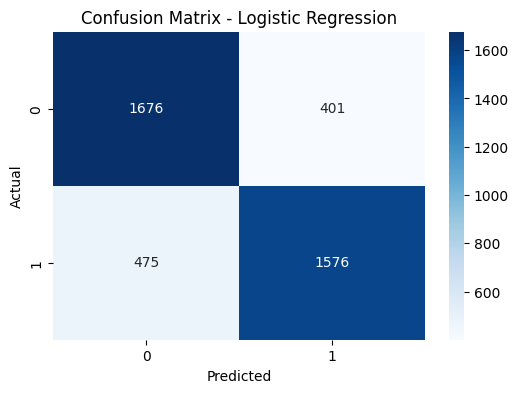

In [98]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_log, y_pred_log),
            annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [99]:
import pickle


In [ ]:
# Save Linear Regression model
with open("linear_regression_model.pkl", "wb") as f:
    pickle.dump(linear_model, f)

# Save Logistic Regression model
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(log_model, f)

print("Models saved successfully!")


Models saved successfully!
